## **Airline Delay Prediction System**

**Summary:**
The airline industry faces significant challenges due to flight delays, which impact customer satisfaction, operational efficiency, and financial performance. This project aims to develop a machine learning-based system for predicting and classifying flight delays using historical flight and weather data.

**The system is designed with two main objectives:**

* **Classification** – Determine whether a scheduled flight will be delayed or on time.

* **Regression** – For delayed flights, estimate the expected duration of the delay.

The dataset includes features such as flight schedules, carrier information, departure and arrival times, airport data, and weather conditions. Data preprocessing steps include handling missing values, feature engineering, and normalization. Multiple machine learning models—such as Random Forest, Gradient Boosting, and Logistic Regression—are evaluated for classification, while regression models are used for delay time prediction.

### ***Dataset Information***

> **Dataset:** [2015 Flight Delays & Cancellations](https://www.kaggle.com/datasets/usdot/flight-delays?&select=flights.csv)
>
> **Source:** Kaggle



### ***Data Features Explanation: (Click for more info about features)***

> **YEAR** – Year of the flight.
>
> **MONTH** – Month of the flight (1–12).
>
> **DAY** – Day of the month (1–31).
> 
> **DAY_OF_WEEK** – Day of the week (1 = Monday, …, 7 = Sunday).
> 
> **AIRLINE** – Airline carrier code (e.g., AA for American Airlines).
> 
> **FLIGHT_NUMBER** – Flight number (assigned by the airline).
> 
> **TAIL_NUMBER** – Unique aircraft identifier (plane registration).
> 
> **ORIGIN_AIRPORT** – Airport code of the departure location.
> 
> **DESTINATION_AIRPORT** – Airport code of the arrival location.
> 
> **SCHEDULED_DEPARTURE** – Planned departure time (HHMM format).
> 
> **DEPARTURE_TIME**– Actual departure time (HHMM format).
> 
> **DEPARTURE_DELAY** – Delay at departure in minutes (negative = early).
> 
> **TAXI_OUT** – Time in minutes from leaving the gate to takeoff.
> 
> **WHEELS_OFF** – Actual time the aircraft took off (HHMM format).
> 
> **SCHEDULED_TIME** – Scheduled total flight time (minutes).
> 
> **ELAPSED_TIME** – Actual total flight time (minutes).
> 
> **AIR_TIME** – Actual airborne time in minutes (takeoff → landing).
> 
> **DISTANCE** – Flight distance in miles.
> 
> **WHEELS_ON** – Actual landing time (HHMM format).
> 
> **TAXI_IN** – Time in minutes from landing to gate arrival.
> 
> **SCHEDULED_ARRIVAL** – Planned arrival time (HHMM format).
> 
> **ARRIVAL_TIME** – Actual arrival time (HHMM format).
> 
> **ARRIVAL_DELAY ***(Regression Target)***** – Delay at arrival in minutes (negative = early).
> 
> **DIVERTED** – 1 if the flight was diverted to another airport, else 0.
> 
> **CANCELLED** – 1 if the flight was canceled, else 0.
> 
> **CANCELLATION_REASON** – Reason code for cancellation (A=Airline, B=Weather, C=NAS, D=Security).
> 
> **AIR_SYSTEM_DELAY** – Delay (minutes) due to air traffic control system.
> 
> **SECURITY_DELAY** – Delay (minutes) due to security issues.
> 
> **AIRLINE_DELAY** – Delay (minutes) caused by the airline (crew, maintenance, etc.).
> 
> **LATE_AIRCRAFT_DELAY** – Delay (minutes) due to late arrival of aircraft.
>
> **WEATHER_DELAY** – Delay (minutes) due to weather conditions.
>
>
>
> #### ***NOTE:* Classification Target is going to be added later on!**
> ###### .

-----------------------------------------

# **Importing Libraries**

In [ ]:
# Data Exploration & preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Model Preparation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option("display.max_columns", None)

# **Data Exploration**

### ***Loading Dataset***

In [3]:
df = pd.read_csv("flights.csv")

C:\Users\Logo\AppData\Local\Temp\ipykernel_1924\1505972477.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("flights.csv")


### ***Dataset First View***

In [ ]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### ***Dataset Shape***

In [ ]:
df.shape

(5819079, 31)

### ***Dataset Columns (Features)***

In [ ]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

### ***Data Types***

In [ ]:
pd.DataFrame({'Name' : df.columns, 'Type' : df.dtypes.values})

,Name,Type
0,YEAR,int64
1,MONTH,int64
2,DAY,int64
3,DAY_OF_WEEK,int64
4,AIRLINE,object
5,FLIGHT_NUMBER,int64
6,TAIL_NUMBER,object
7,ORIGIN_AIRPORT,object
8,DESTINATION_AIRPORT,object
9,SCHEDULED_DEPARTURE,int64


### ***Dataset Statistical Discription***

In [ ]:
df.describe().round(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5819079.00,5819079.00,5819079.00,5819079.00,5819079.00,5732926.00,5732926.00,5730032.00,5730032.00,5819073.00,5714008.00,5714008.00,5819079.00,5726566.00,5726566.00,5819079.00,5726566.00,5714008.00,5819079.00,5819079.00,1063439.00,1063439.00,1063439.00,1063439.00,1063439.00
mean,2015.0,6.52,15.70,3.93,2173.09,1329.60,1335.20,9.37,16.07,1357.17,141.69,137.01,113.51,822.36,1471.47,7.43,1493.81,1476.49,4.41,0.00,0.02,13.48,0.08,18.97,23.47,2.92
std,0.0,3.41,8.78,1.99,1757.06,483.75,496.42,37.08,8.90,498.01,75.21,74.21,72.23,607.78,522.19,5.64,507.16,526.32,39.27,0.05,0.12,28.00,2.14,48.16,43.20,20.43
min,2015.0,1.00,1.00,1.00,1.00,1.00,1.00,-82.00,1.00,1.00,18.00,14.00,7.00,21.00,1.00,1.00,1.00,1.00,-87.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2015.0,4.00,8.00,2.00,730.00,917.00,921.00,-5.00,11.00,935.00,85.00,82.00,60.00,373.00,1054.00,4.00,1110.00,1059.00,-13.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2015.0,7.00,16.00,4.00,1690.00,1325.00,1330.00,-2.00,14.00,1343.00,123.00,118.00,94.00,647.00,1509.00,6.00,1520.00,1512.00,-5.00,0.00,0.00,2.00,0.00,2.00,3.00,0.00
75%,2015.0,9.00,23.00,6.00,3230.00,1730.00,1740.00,7.00,19.00,1754.00,173.00,168.00,144.00,1062.00,1911.00,9.00,1918.00,1917.00,8.00,0.00,0.00,18.00,0.00,19.00,29.00,0.00
max,2015.0,12.00,31.00,7.00,9855.00,2359.00,2400.00,1988.00,225.00,2400.00,718.00,766.00,690.00,4983.00,2400.00,248.00,2400.00,2400.00,1971.00,1.00,1.00,1134.00,573.00,1971.00,1331.00,1211.00


### ***Dataset Info***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

### ***Missing Values***

In [ ]:
pd.DataFrame({'Name' : df.columns, 'Missing Count' : df.isna().sum().values})

,Name,Missing Count
0,YEAR,0
1,MONTH,0
2,DAY,0
3,DAY_OF_WEEK,0
4,AIRLINE,0
5,FLIGHT_NUMBER,0
6,TAIL_NUMBER,14721
7,ORIGIN_AIRPORT,0
8,DESTINATION_AIRPORT,0
9,SCHEDULED_DEPARTURE,0


### ***Heatmap of Missing Values***

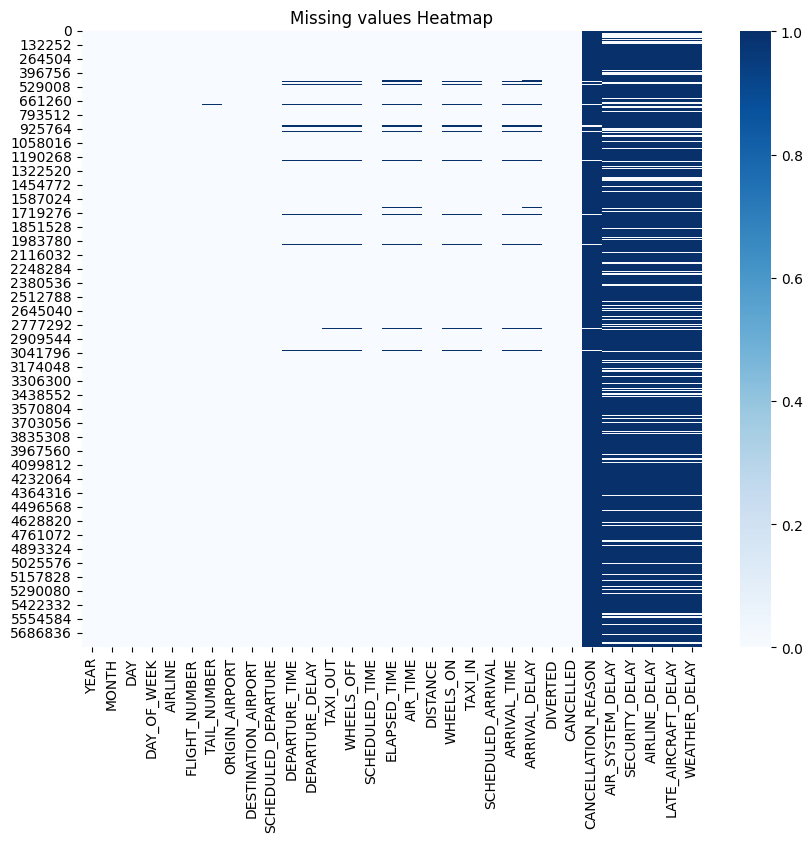

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap='Blues')
plt.title("Missing values Heatmap")
plt.show()

### ***Duplicated Values***

In [ ]:
df.duplicated().sum()

0

### ***Regression Target***

* *Statistical Discribtion*

In [ ]:
df['ARRIVAL_DELAY'].describe().round(1)

count    5714008.0
mean           4.4
std           39.3
min          -87.0
25%          -13.0
50%           -5.0
75%            8.0
max         1971.0
Name: ARRIVAL_DELAY, dtype: float64

* *Histplot*

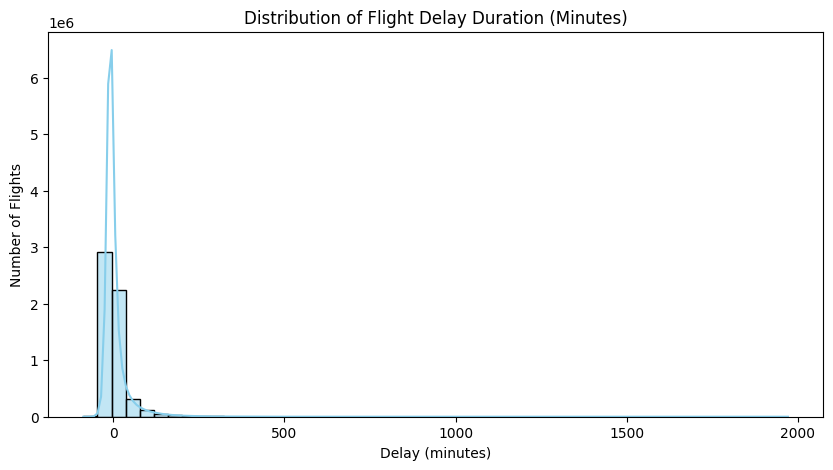

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['ARRIVAL_DELAY'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Flight Delay Duration (Minutes)")
plt.xlabel("Delay (minutes)")
plt.ylabel("Number of Flights")
plt.show()

### ***Exploring Categorical Features***

In [ ]:
df.select_dtypes('object').columns

Index(['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'CANCELLATION_REASON'],
      dtype='object')

* ***Category count per Column***

1. *AIRLINE*

In [ ]:
len(df['AIRLINE'].unique())

14

2. *TAIL_NUMBER*

In [ ]:
len(df['TAIL_NUMBER'].unique())

4898

3. *ORIGIN_AIRPORT*

In [ ]:
len(df['ORIGIN_AIRPORT'].unique())

930

4. *DESTINATION_AIRPORT*

In [ ]:
len(df['DESTINATION_AIRPORT'].unique())

930

5. *CANCELLATION_REASON*

In [ ]:
len(df['CANCELLATION_REASON'].unique())

5

# ***Initial Insights***

>
>
> 1. **Target Variable (Regression: ARRIVAL_DELAY)**
>   
>       * **Distribution** - Most flights arrive early, delays within **-13 - 8** min *(-13 indicates early arrival)*. 
>
>       * **Outliers** - Some extreme delays > 1000 minutes.
> 
>
> 2. **Missing Values**
>
>       * **Columns with Missing values**
>
>          * SCHEDULED_TIME : ~0.0001% Missing
>
>          * TAIL_NUMBER : ~0.25% Missing
>   
>          * DEPARTURE_TIME **|** DEPARTURE_DELAY **|** TAXI_OUT **|** WHEELS_OFF : ~1.5% Missing
>
>          * WHEELS_ON **|** TAXI_IN **|** ARRIVAL_TIME : ~1.6% Missing
>
>          * ELAPSED_TIME **|** AIR_TIME **|** ARRIVAL_DELAY : ~1.8% Missing
>
>          * AIR_SYSTEM_DELAY **|** SECURITY_DELAY **|** AIRLINE_DELAY **|** LATE_AIRCRAFT_DELAY **|** WEATHER_DELAY: ~**81.7%** Missing
>
>          * CANCELLATION_REASON: ~**98.4%** Missing
>
>       * **Observation** - Features with high NAN values will not provide consistant signals for the model.
>
>       * **Action** - Drop high-NAN columns, Moderate other features.
>
>
>3. **Duplications**
>       * No Duplicated Records Found.
>
>4. **Categorical Columns**
>       * Sense TAIL_NUMBER column has almost 5000 different unique values, we can ignore the fact that it's a categorical feature, so it's not nessecary to convert its type.
>
>
>.
>. 

__________________________________________________________________________________________

# **Data Cleaning Before EDA**

### ***Handling High-NAN Columns***

> ###### .
> * #### **Solution** - Drop the columns with high NAN values count.
>
> * #### **Reasoning:**
>
>   * These columns contain a very high percentage of missing values, making them unreliable for consistent modeling.
>
>   * Most of them represent post-flight outcomes, which are not known before the flight occurs. Since my goal is to predict delays, including these columns would introduce data leakage (using information that would only be available after the fact).
>
>   * For the classification model (predicting whether a flight is delayed), these columns are not essential and may even reduce generalization.
>
>   * For the regression model (predicting the amount of delay), these columns could theoretically help, but only if the data were complete. Given the high level of missingness and their post-event nature, keeping them would likely harm the model’s reliability.
>
> * #### **Conclusion:**
>   
>   Dropping these columns ensures a cleaner dataset, avoids leakage, and helps maintain the practical usability of the predictive models.
>
> ###### .

In [4]:
df = df.drop(columns=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLATION_REASON'])

### ***Convert Object (Categorical Features) to Category***

> * **Reasons**
>
>   1. Memory Efficiency
>
>       * Instead of storing repeated strings for every row, Pandas stores only integer codes + a lookup table of unique categories.
>
>       * This reduces memory usage significantly, especially with large datasets.
>
>   2. Faster Computations
>
>       * Operations like groupby, value_counts, and joins/merges run faster on categorical columns compared to strings. 

In [5]:
df[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']] = df[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']].astype("category")

### **Droping Flight Number**

> * **Reasons**
>
>   * High cardinality & low predictive signal
>
>   * Each flight number is usually unique or nearly unique, so it doesn’t repeat enough for the model to learn patterns.
>
>   * Encoding it (one-hot or frequency) would create a huge number of mostly meaningless columns.
>
>   * Doesn’t carry operational information
>
>   * Flight numbers are just identifiers — they don’t tell you about delays, airports, or airline performance.
>
>   * May introduce noise
>
>   * The model could overfit on specific flight numbers that happen to have delays in your dataset but won’t generalize to new flights.
>
> ###### .

In [6]:
df = df.drop(columns=['FLIGHT_NUMBER'])

### **Droping Cancelled & Diverted**

> * **Reasons**
>
>   * Both columns (CANCELLED and DIVERTED) contain almost exclusively 0 values in the dataset.
>
>   * They do not provide any useful information for predicting delays, as there are no canceled or diverted flights to learn from.
>
>   * Keeping them would increase dataset size unnecessarily without improving model performance.
> ###### .

In [7]:
df['CANCELLED'].value_counts()

CANCELLED
0    5729195
1      89884
Name: count, dtype: int64

In [8]:
df['DIVERTED'].value_counts()

DIVERTED
0    5803892
1      15187
Name: count, dtype: int64

In [9]:
df = df.drop(columns=['CANCELLED', 'DIVERTED'])

### **Droping Features Out of Project Scope**

>###### .
> The problem with using features like **ELAPSED_TIME**, **ARRIVAL_TIME**, **WHEELS_ON**, and **TAXI_IN** is that they are only available after the **flight has already landed**. Including them in the model creates **data leakage**, because the model would be learning from information it would never have at prediction time. To keep the model realistic and predictive, such post-flight features must be dropped.
>###### .

In [10]:
df = df.drop(columns=['WHEELS_ON', 'ARRIVAL_TIME', 'ELAPSED_TIME', 'TAXI_IN', 'AIR_TIME'])

------------------------------------------------------------------------------------------------------

# **Exploratory Data Analysis (EDA)**

###     Regression Target Variable Analysis (Arrival Delay)

* ***Histogram + KDE***

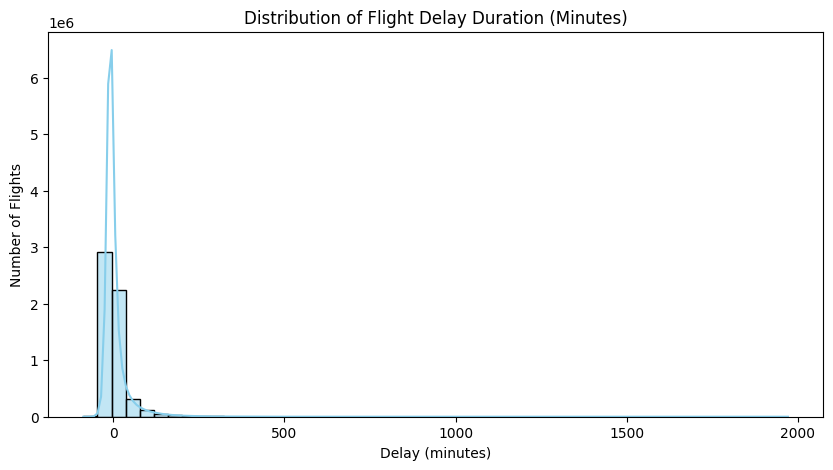

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['ARRIVAL_DELAY'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Flight Delay Duration (Minutes)")
plt.xlabel("Delay (minutes)")
plt.ylabel("Number of Flights")
plt.show()

* ***Box Plot***

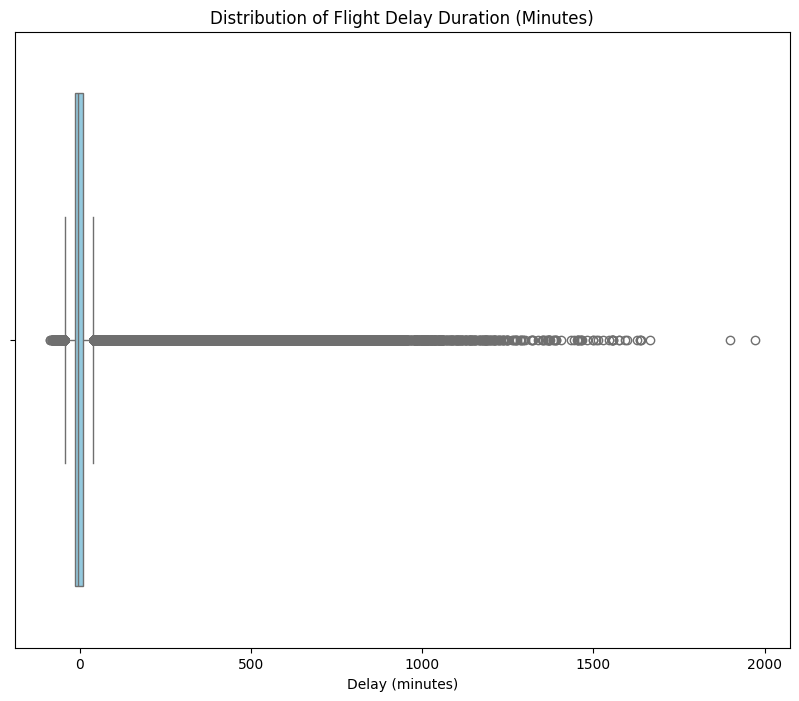

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['ARRIVAL_DELAY'], color='skyblue')
plt.title("Distribution of Flight Delay Duration (Minutes)")
plt.xlabel("Delay (minutes)")
plt.show()


***Categorical Features VS Target***

* ***Airline***

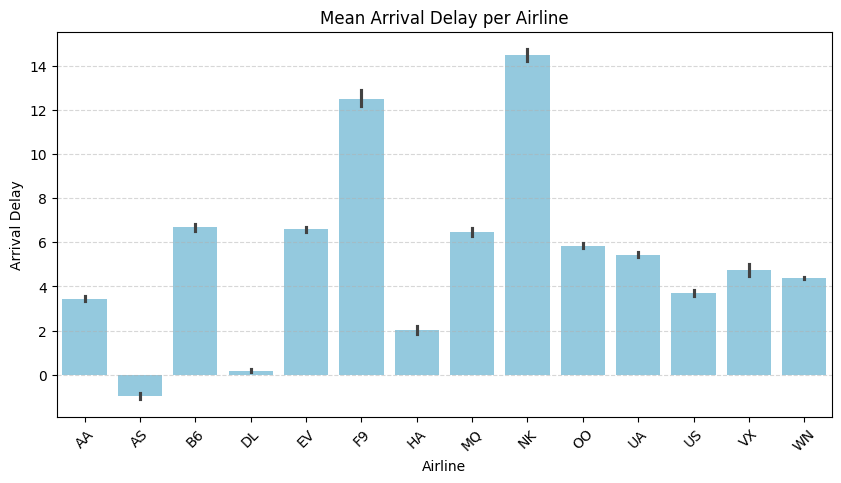

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data= df, x='AIRLINE', y='ARRIVAL_DELAY', color='skyblue')
plt.title("Mean Arrival Delay per Airline")
plt.xlabel("Airline")
plt.ylabel("Arrival Delay") 
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

* ***Origin Airports with Most Delay***

In [ ]:
data = df.groupby('ORIGIN_AIRPORT')['ARRIVAL_DELAY'].max().sort_values(ascending=False).head(10)
data = pd.DataFrame({'Airport' : data.index, 'Delay' : data.values})
data

C:\Users\Logo\AppData\Local\Temp\ipykernel_14736\3618594578.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby('ORIGIN_AIRPORT')['ARRIVAL_DELAY'].max().sort_values(ascending=False).head(10)


,Airport,Delay
0,BHM,1971.0
1,RIC,1898.0
2,SAN,1665.0
3,DTW,1638.0
4,IND,1636.0
5,ABQ,1636.0
6,STL,1627.0
7,OMA,1598.0
8,LAS,1593.0
9,HNL,1576.0


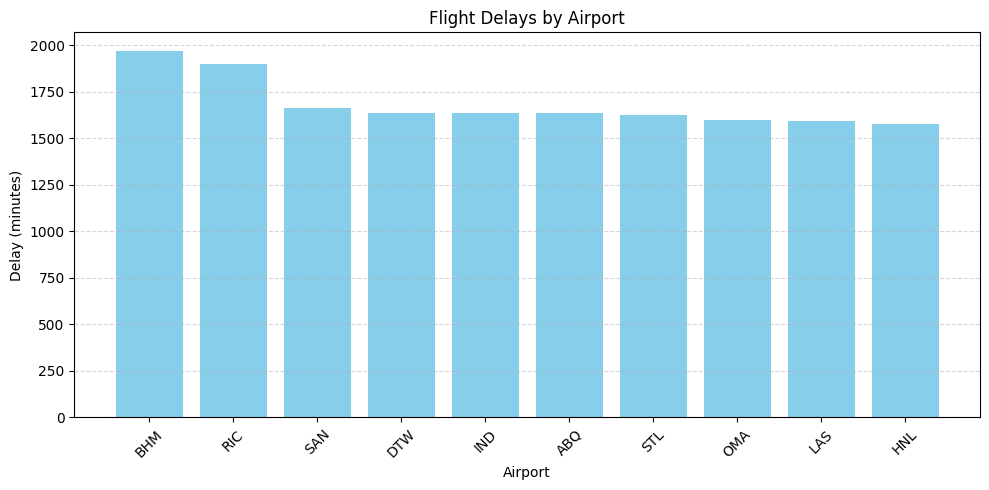

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(data['Airport'], data['Delay'], color='skyblue')
plt.title('Flight Delays by Airport')
plt.xlabel('Airport')
plt.ylabel('Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


***Numerical Features VS Target***

* ***Departure Delay Vs Arrival Delay***

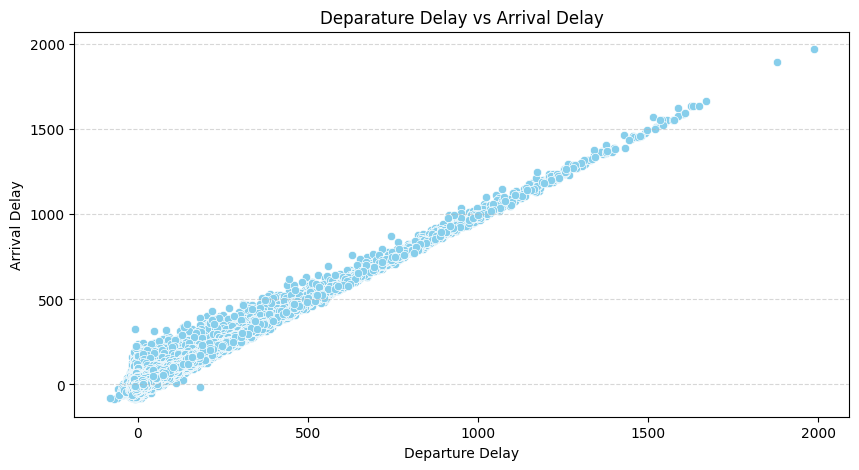

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x= df['DEPARTURE_DELAY'], y= df['ARRIVAL_DELAY'], color='skyblue')
plt.title('Deparature Delay vs Arrival Delay')
plt.xlabel("Departure Delay")
plt.ylabel("Arrival Delay")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

* ***TAXI_OUT Vs Arrival Delay***

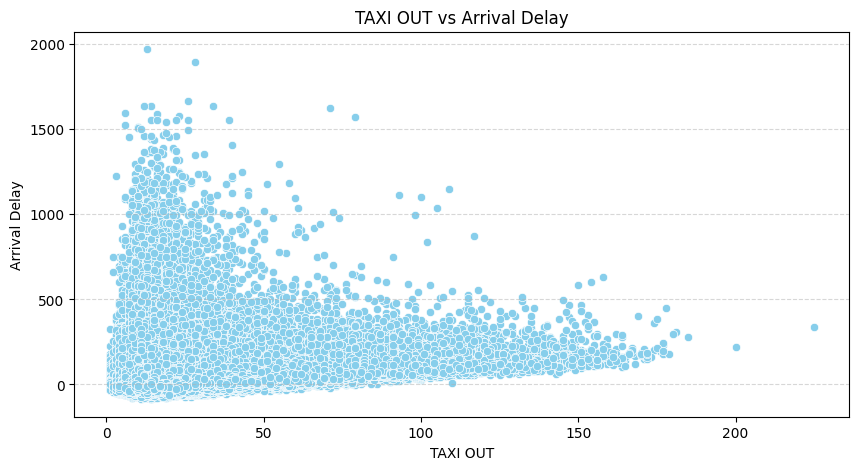

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x= df['TAXI_OUT'], y= df['ARRIVAL_DELAY'], color='skyblue')
plt.title('TAXI OUT vs Arrival Delay')
plt.xlabel("TAXI OUT")
plt.ylabel("Arrival Delay")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

***Outlieres Exploration***

* ***Departure Delay***

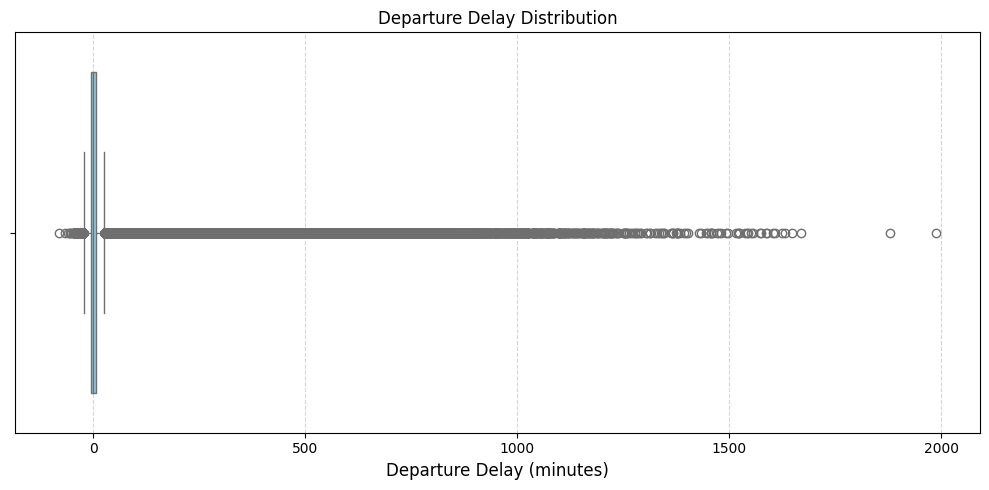

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='DEPARTURE_DELAY', color='skyblue')
plt.title('Departure Delay Distribution')
plt.xlabel('Departure Delay (minutes)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


* ***TAXI OUT***

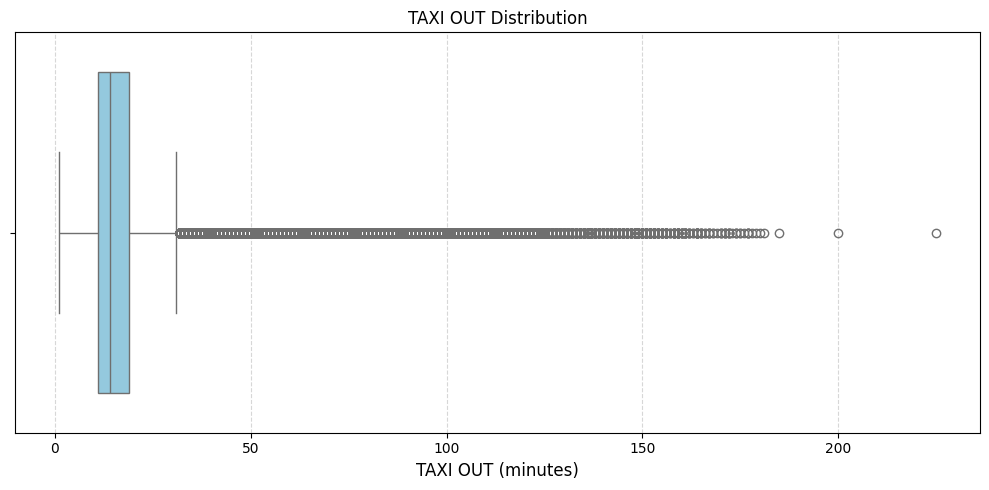

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='TAXI_OUT', color='skyblue')
plt.title('TAXI OUT Distribution')
plt.xlabel('TAXI OUT (minutes)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


* ***Arrival Delay Vs Airline***

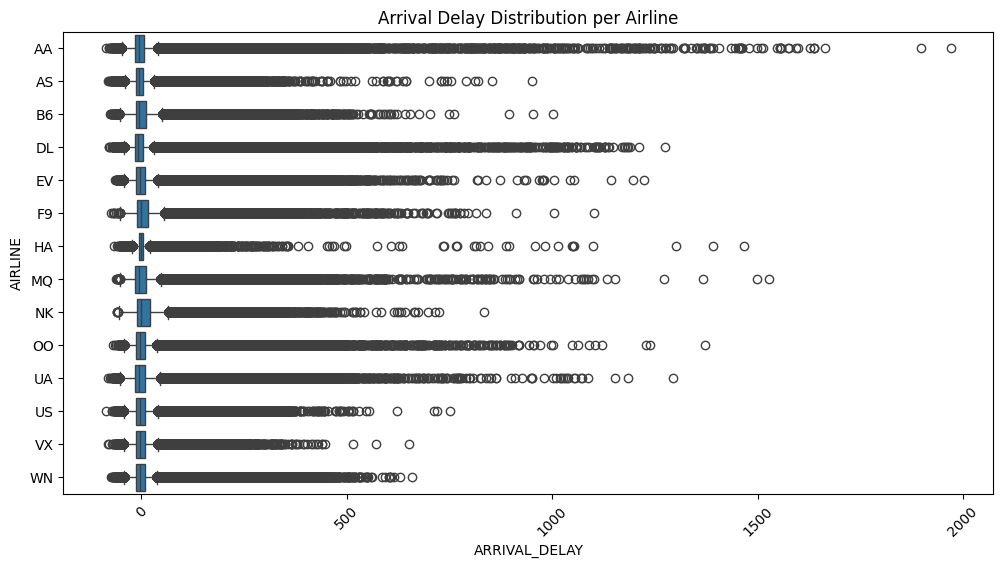

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="ARRIVAL_DELAY", y="AIRLINE", data=df)
plt.xticks(rotation=45)
plt.title("Arrival Delay Distribution per Airline")
plt.show()

***Correlation Heatmap***

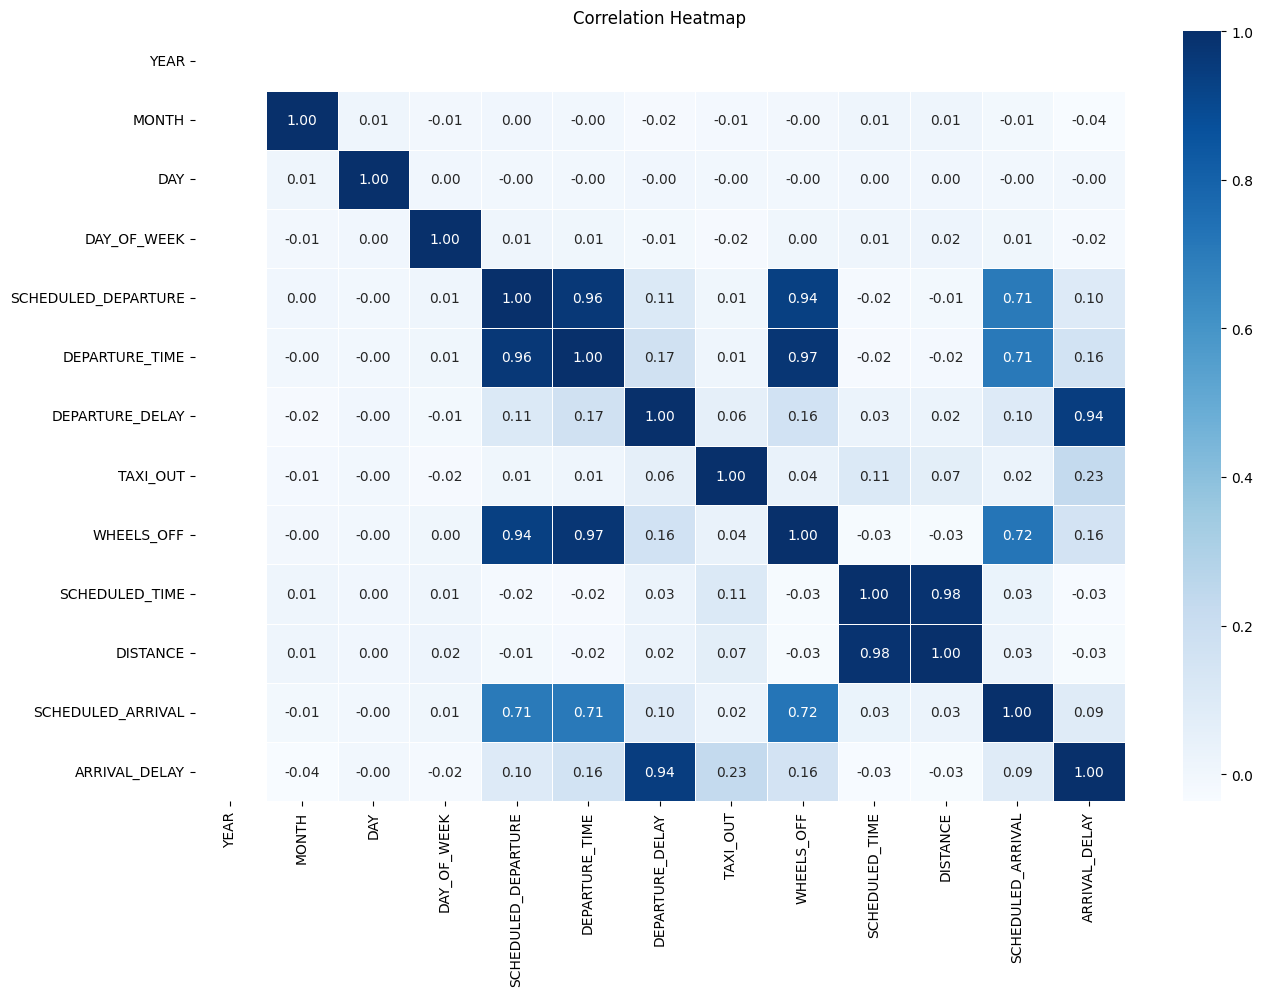

In [ ]:

Num_Features = df.select_dtypes(include=['float64', 'int64'])
corr = Num_Features.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap='Blues', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



# ***EDA Insights***

>* ### ***Target Variable (Arrival Delay)***
>   *  #### ***Plots Used:** Histogram Plot with KDE, Boxplot.*
>   *  #### ***Key Findings:***
>        * **Distribution Shape:** Right Skewed.
>        * **Typical delay range:** [-5, +10] minutes.
>        * There are extreme delays identified beyond 500 minute.
>   *  #### ***Explanation**:*
>       ##### The distribution shows that most flights arrive close to schedule, often within a small early/late window (–5 to +10 minutes). However, the right skew and presence of extreme outliers (500+ minutes) indicate that while severe delays are relatively rare, they heavily impact the overall distribution. This highlights the importance of accounting for outliers in modeling, as they may distort averages but still represent critical operational challenges.
>* ### ***Airline VS Arrival Delay***
>   *  #### ***Plots Used:** Barplot (Average Arrival Delay per Airline)*
>   *  #### ***Key Findings:***
>       * Airlines differ in average arrival delays.
>       * **Top 3 Best Airlines on Average:** (AS, DL, HA) .
>       * **Top 3 Worst Airlines on Average:** (NK, F9, B6).
>   *  #### ***Explanation**:*
>       ##### The results suggest that airline choice plays a significant role in on-time performance. Some carriers demonstrate more efficient operations and better scheduling reliability, while others experience higher average delays, possibly due to operational constraints, resource allocation, or network structures. This indicates that airline-specific factors could be strong predictors in modeling arrival delays. 
>* ### ***Oprtational Features***
>   *  #### ***Plots Used:** Boxplots, Scatterplots and Correlation Heatmap.*
>   *  #### ***Key Findings:***
>       * **Depature Delay:** Strong Positive Influence on Arrival Delay.
>       * **TAXI OUT:** longer taxi-out times **slightly** increase likelihood of late arrival.
>       * **Features that infeluence Arrival Delay the most (in order):** [Departure Delay, TAXI OUT, Departure Time, Wheels Off].
>   *  #### ***Explanation:***
>       ##### Departure delay is the strongest driver of arrival delay, while taxi-out time shows a slight effect, and taxi-in time and air time have very weak influence. This suggests that delays are mainly rooted in pre-flight and departure processes rather than flight duration or post-landing operations. 
>###### .

-------------------------------------

# **Feature Engineering & Data Preprocessing**

## **Handling Outliers**

> ### **We'll work on the features that affect our Target the most, Which Are:**
>   * Departure Delay.
>
>   * TAXI OUT.
>
>   * Departure Time.
>
>   * Wheels Off.
>
> ###### .

In [11]:
for col in ["DEPARTURE_DELAY", "TAXI_OUT", "DEPARTURE_TIME", "WHEELS_OFF", "ARRIVAL_DELAY"]:
    q_low = df[col].quantile(0.01)
    q_high = df[col].quantile(0.99)
    df[col] = df[col].clip(q_low, q_high)

## **Handling Missing Values**

* #### ***Columns with < 1% Missing Values***
   * ##### Drop the records with missing values.

In [12]:
df = df.dropna(subset=['SCHEDULED_TIME', 'TAIL_NUMBER'])

* #### ***Numerical Columns with Missing Values***
    * We'll handle the main **[Duration]** features by replacing the null values with the **Mean**.
    
    * We'll handle the main **[Time]** features by replacing the null values with the **Mode**.
    
    * The other features We'll use an approach that is **not** senstive to **Outliers** (Median) or (Mode).

    * For the Target we **avoid replacing the NULL** values to not make the model Biased to a specific value, so we **drop the rows** with missing values - sense we have so many records - it won't affect the data.

In [13]:
#Target Column
df = df.dropna(subset='ARRIVAL_DELAY')

In [14]:
#Important Features
for col in ["DEPARTURE_DELAY", "TAXI_OUT"]:
    df[col] = df[col].fillna(df[col].median())

for col in ["DEPARTURE_TIME", "WHEELS_OFF"]:
    df[col] = df[col].fillna(df[col].mode()[0])


## **Classification Target**

> #### ***Why 15 minutes?***
>    * ##### Airlines and airports allow a “grace period” because of minor operational issues (taxiing, weather adjustments, gate changes) that don’t meaningfully impact the passenger experience.
>
> ###### .

In [15]:
df['IS_DELAYED'] = (df['ARRIVAL_DELAY'] > 15).astype(int)

* #### **Chech For Class Balance**

In [16]:
df['IS_DELAYED'].value_counts()

IS_DELAYED
0    4690510
1    1023498
Name: count, dtype: int64

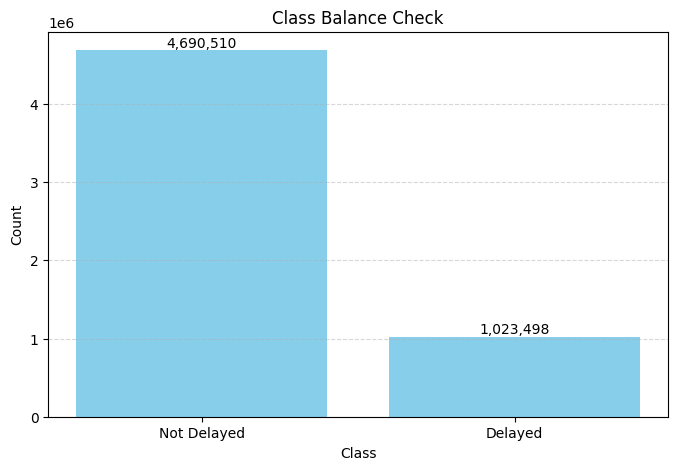

In [17]:
balance_df = pd.DataFrame({'Values' : df['IS_DELAYED'].value_counts().index, 'count' : df['IS_DELAYED'].value_counts().values})
plt.figure(figsize=(8, 5))
bars = plt.bar(balance_df['Values'], balance_df['count'], color='skyblue')
plt.title("Class Balance Check")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Delayed', 'Delayed'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100,   # adjust offset
             f"{height:,}", ha='center', va='bottom', fontsize=10)
plt.show()

## **Handling Categorical Features**

> #### ***Available Categorical Featuers***
>
>   * **TAIL_NUMBER:** too many unique IDs, not useful for model training. It's better to **Drop**.
>
>   * **ORIGIN_AIRPORT | DESTINATION_AIRPORT:** can be useful, but very high cardinality (~ 1000 unique airport).
>
>   * **AIRLINE:** ***useful*** with small number of categories (~ 5). Can be handled using **OneHotEncoding**. 
>
> ###### .

* #### **TAIL_NUMBER**

In [18]:
df = df.drop(columns=['TAIL_NUMBER'])

* #### **AIRLINE**

In [19]:
#OneHotEncoding

df = pd.get_dummies(df, columns=["AIRLINE"], drop_first=False)

In [20]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,IS_DELAYED,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,2015,1,1,4,ANC,SEA,5,2300.0,-11.0,21.0,509.0,205.0,1448,430,-22.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2015,1,1,4,LAX,PBI,10,511.0,-8.0,12.0,509.0,280.0,2330,750,-9.0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2015,1,1,4,SFO,CLT,20,511.0,-2.0,16.0,509.0,286.0,2296,806,5.0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,2015,1,1,4,LAX,MIA,20,511.0,-5.0,15.0,509.0,285.0,2342,805,-9.0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2015,1,1,4,SEA,ANC,25,511.0,-1.0,11.0,509.0,235.0,1448,320,-21.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False


* #### **Origin Airport & Destination Airport**

>  #### ***Encoding Strategy***
>   ##### For the features **ORIGIN_AIRPORT** and **DESTINATION_AIRPORT**, which have a very large number of unique categories, I decided to use ***frequency encoding***. This approach **replaces each category with the count of its occurrences** in the dataset. *The choice was made because* one-hot encoding would create an extremely large number of columns (thousands of airports), leading to sparsity and inefficiency in both computation and memory usage. Frequency encoding provides a compact representation while still preserving some information about how common or rare a category is.
>
> #### ***Downsides of Frequency Encoding***
>   * It introduces an **artificial ordinal relationship** between categories, as airports with higher frequency values are numerically *“greater”* even though there is no natural order between them.
>
>   * Multiple categories can share the same frequency, making them indistinguishable in the encoded representation.
>
>   * It **does not** consider the relationship between a category and the target variablem ***Example***: whether an airport is more likely to be delayed.
>
> #### ***Alternatives if Model Performace Unsatisfactory***
>   * **Target Encoding:** Replace each category with the **average target value**. This **captures category–target relationships** but *must be used with cross-validation to avoid target leakage*.
>
>   * **Hashing Encoding:** Map categories into a fixed number of columns using a hashing function. This avoids explosion in dimensionality but introduces collisions (different categories mapped to the same value).
>
>   * **Feature Dropping:** If tests show that these features do not improve model performance, they can be removed entirely.
>
> ###### .

* ***Frequency encode ORIGIN_AIRPORT***

In [21]:
origin_freq = df['ORIGIN_AIRPORT'].value_counts() / len(df)
df['ORIGIN_AIRPORT_FE'] = df['ORIGIN_AIRPORT'].map(origin_freq)

* ***Frequency encode DESTINATION_AIRPORT***

In [22]:
dest_freq = df['DESTINATION_AIRPORT'].value_counts() / len(df)
df['DESTINATION_AIRPORT_FE'] = df['DESTINATION_AIRPORT'].map(dest_freq)

* ***Drop Original Columns***

In [23]:
df = df.drop(columns=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])

## **Prepare (Classification/Regression) Datasets**

> ###### .
> 
>* We need to separate the dataset of classification & regression, *because* each one has **different target** & **also different features**.
>
> * for the ***classification model*** dataset we need to **remove** the features which **correspond to data after the flight takes off**.
> * On the other hand, the ***regression model dataset*** should contain some other features, it *may also contain post flight take off data*, we also need to **remove records corresponding to flights without delay time**. as our model should learn on flights that are delayed to predict the delay time of delayed flights.
>
> ###### .

### **Classificatoin Dataset**

> #### **We'll Keep The Following Featues:**
>   * **YEAR**, **MONTH**, **DAY**, **DAY_OF_WEEK** - temporal patterns (seasonality, weekends).
>
>   * **AIRLINE Econded** - some airlines are more/less punctual.
>
>   * **ORIGIN_AIRPORT_FE**, **DESTINATION_AIRPORT_FE**.
>
>   * **SCHEDULED_DEPARTURE** - peak vs off-peak.
>
>   * **SCHEDULED_TIME**, **SCHEDULED_ARRIVAL**, **DISTANCE** - longer flights might have more delay risk.
> #### **Drop:**
>   * **Actual / Post-flight features:** 
>       * DEPARTURE_TIME. 
>       * DEPARTURE_DELAY. 
>       * TAXI_OUT, WHEELS_OFF. 
>
> #### **Target:** IS_DELAYED
> ###### .

* Create Classification Dataset

In [24]:
class_df = df.drop(columns=['DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'ARRIVAL_DELAY'])

* Display First Few Records

In [25]:
class_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,IS_DELAYED,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN,ORIGIN_AIRPORT_FE,DESTINATION_AIRPORT_FE
0,2015,1,1,4,5,205.0,1448,430,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,0.002768,0.019285
1,2015,1,1,4,10,280.0,2330,750,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.033602,0.003886
2,2015,1,1,4,20,286.0,2296,806,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0.025462,0.017296
3,2015,1,1,4,20,285.0,2342,805,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.033602,0.011955
4,2015,1,1,4,25,235.0,1448,320,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,0.019282,0.002768


### **Regression Dataset**

> #### **We'll Keep The Following Featues:**
>   * **YEAR**, **MONTH**, **DAY**, **DAY_OF_WEEK**
>
>   * **SCHEDULED_DEPARTURE**, **SCHEDULED_ARRIVAL**
>
>   * **SCHEDULED_TIME**, **DISTANCE**
>
>   * **AIRLINE (one-hot encoded)**
>
>   * **ORIGIN_AIRPORT_FE**, **DESTINATION_AIRPORT_FE**
>
>   * **DEPARTURE_DELAY**, **TAXI_OUT**
>
> #### **We'll Drop**
>   * IS_DELAYED. 
>
> #### **Target:** ARRIVAL_DELAY
> ###### .

> #### **Why Drop Records with ARRIVAL_DELAY ≤ 15 in Regression Dataset?**
> In this project, we defined a flight as delayed only if the arrival delay is **greater than 15 minutes**. Records with **ARRIVAL_DELAY ≤ 15** (whether negative, zero, or small positive values) represent flights that are *on time* or only slightly delayed, and are already handled in the classification task. Keeping them in the regression dataset would add noise and confuse the model. Therefore, **we only retain records where ARRIVAL_DELAY > 15** so the regression model learns to predict meaningful delay durations.
>
> ###### .

* Create Regression Dataset

In [26]:
reg_df = df.drop(columns=['IS_DELAYED'])

* Fileter Records with no Arrival Delays

In [27]:
reg_df = reg_df[reg_df['ARRIVAL_DELAY'] > 15]

In [28]:
reg_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN,ORIGIN_AIRPORT_FE,DESTINATION_AIRPORT_FE
27,2015,1,1,4,115,511.0,12.0,14.0,509.0,207.0,1487,542,25.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0.019436,0.012719
30,2015,1,1,4,125,511.0,72.0,9.0,509.0,204.0,1440,549,43.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0.025473,0.048279
50,2015,1,1,4,307,511.0,-3.0,25.0,509.0,173.0,1129,500,20.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0.000233,0.019171
52,2015,1,1,4,400,535.0,95.0,9.0,544.0,185.0,1189,605,85.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0.004270,0.019171
55,2015,1,1,4,438,550.0,72.0,15.0,605.0,241.0,1666,739,89.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0.004270,0.003221


#### **Checking Classification Dataset**

* View First Few Rows

In [29]:
class_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,IS_DELAYED,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN,ORIGIN_AIRPORT_FE,DESTINATION_AIRPORT_FE
0,2015,1,1,4,5,205.0,1448,430,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,0.002768,0.019285
1,2015,1,1,4,10,280.0,2330,750,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.033602,0.003886
2,2015,1,1,4,20,286.0,2296,806,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0.025462,0.017296
3,2015,1,1,4,20,285.0,2342,805,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.033602,0.011955
4,2015,1,1,4,25,235.0,1448,320,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,0.019282,0.002768


* Shape

In [30]:
class_df.shape

(5714008, 25)

* Features

In [31]:
class_df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'IS_DELAYED',
       'AIRLINE_AA', 'AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV',
       'AIRLINE_F9', 'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO',
       'AIRLINE_UA', 'AIRLINE_US', 'AIRLINE_VX', 'AIRLINE_WN',
       'ORIGIN_AIRPORT_FE', 'DESTINATION_AIRPORT_FE'],
      dtype='object')

* Statistical View

In [32]:
class_df.describe().round(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,IS_DELAYED,ORIGIN_AIRPORT_FE,DESTINATION_AIRPORT_FE
count,5714008.0,5714008.00,5714008.00,5714008.00,5714008.00,5714008.00,5714008.00,5714008.00,5714008.00,5714008.00,5714008.00
mean,2015.0,6.55,15.71,3.93,1328.91,141.89,824.46,1493.19,0.18,0.02,0.02
std,0.0,3.40,8.77,1.99,483.53,75.31,608.66,506.90,0.38,0.02,0.02
min,2015.0,1.00,1.00,1.00,1.00,18.00,31.00,1.00,0.00,0.00,0.00
25%,2015.0,4.00,8.00,2.00,916.00,85.00,373.00,1110.00,0.00,0.00,0.00
50%,2015.0,7.00,16.00,4.00,1325.00,123.00,650.00,1520.00,0.00,0.01,0.01
75%,2015.0,9.00,23.00,6.00,1730.00,174.00,1065.00,1917.00,0.00,0.03,0.03
max,2015.0,12.00,31.00,7.00,2359.00,718.00,4983.00,2400.00,1.00,0.06,0.06


* Missing Values & Duplications

In [33]:
print(f"Missing values: \n{class_df.isna().sum()}")
print("-"*20)
print(f"Duplications:\n {class_df.duplicated().sum()}")

Missing values: 
YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
SCHEDULED_DEPARTURE       0
SCHEDULED_TIME            0
DISTANCE                  0
SCHEDULED_ARRIVAL         0
IS_DELAYED                0
AIRLINE_AA                0
AIRLINE_AS                0
AIRLINE_B6                0
AIRLINE_DL                0
AIRLINE_EV                0
AIRLINE_F9                0
AIRLINE_HA                0
AIRLINE_MQ                0
AIRLINE_NK                0
AIRLINE_OO                0
AIRLINE_UA                0
AIRLINE_US                0
AIRLINE_VX                0
AIRLINE_WN                0
ORIGIN_AIRPORT_FE         0
DESTINATION_AIRPORT_FE    0
dtype: int64
--------------------
Duplications:
 171


* Drop Duplications

In [34]:
class_df = class_df.drop_duplicates()

`````````````````

#### **Checking Regression Dataset**

* View First Few Rows

In [35]:
reg_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN,ORIGIN_AIRPORT_FE,DESTINATION_AIRPORT_FE
27,2015,1,1,4,115,511.0,12.0,14.0,509.0,207.0,1487,542,25.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0.019436,0.012719
30,2015,1,1,4,125,511.0,72.0,9.0,509.0,204.0,1440,549,43.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0.025473,0.048279
50,2015,1,1,4,307,511.0,-3.0,25.0,509.0,173.0,1129,500,20.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0.000233,0.019171
52,2015,1,1,4,400,535.0,95.0,9.0,544.0,185.0,1189,605,85.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0.004270,0.019171
55,2015,1,1,4,438,550.0,72.0,15.0,605.0,241.0,1666,739,89.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0.004270,0.003221


* Shape

In [36]:
reg_df.shape

(1023498, 29)

* Features

In [37]:
reg_df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY',
       'AIRLINE_AA', 'AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV',
       'AIRLINE_F9', 'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO',
       'AIRLINE_UA', 'AIRLINE_US', 'AIRLINE_VX', 'AIRLINE_WN',
       'ORIGIN_AIRPORT_FE', 'DESTINATION_AIRPORT_FE'],
      dtype='object')

* Statistical View

In [38]:
reg_df.describe().round(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_AIRPORT_FE,DESTINATION_AIRPORT_FE
count,1023498.0,1023498.00,1023498.00,1023498.00,1023498.00,1023498.00,1023498.00,1023498.00,1023498.00,1023498.00,1023498.0,1023498.00,1023498.00,1023498.00,1023498.00
mean,2015.0,6.23,15.56,3.88,1470.42,1536.50,51.70,19.87,1561.32,142.92,831.9,1622.69,55.65,0.02,0.02
std,0.0,3.41,8.80,1.98,454.73,469.58,46.86,11.56,470.97,75.15,605.9,505.95,42.88,0.02,0.02
min,2015.0,1.00,1.00,1.00,1.00,511.00,-13.00,6.00,509.00,18.00,31.0,1.00,16.00,0.00,0.00
25%,2015.0,3.00,8.00,2.00,1120.00,1159.00,19.00,12.00,1214.00,86.00,383.0,1301.00,24.00,0.01,0.00
50%,2015.0,6.00,16.00,4.00,1525.00,1608.00,39.00,16.00,1624.00,125.00,674.0,1716.00,39.00,0.02,0.02
75%,2015.0,9.00,23.00,5.00,1835.00,1926.00,72.00,24.00,1942.00,175.00,1069.0,2029.00,72.00,0.03,0.03
max,2015.0,12.00,31.00,7.00,2359.00,2300.00,168.00,50.00,2307.00,718.00,4983.0,2400.00,167.00,0.06,0.06


* Missing Values & Duplications

In [39]:
print(f"Missing values: \n{reg_df.isna().sum()}")
print("-"*20)
print(f"Duplications:\n {reg_df.duplicated().sum()}")

Missing values: 
YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME            0
DEPARTURE_DELAY           0
TAXI_OUT                  0
WHEELS_OFF                0
SCHEDULED_TIME            0
DISTANCE                  0
SCHEDULED_ARRIVAL         0
ARRIVAL_DELAY             0
AIRLINE_AA                0
AIRLINE_AS                0
AIRLINE_B6                0
AIRLINE_DL                0
AIRLINE_EV                0
AIRLINE_F9                0
AIRLINE_HA                0
AIRLINE_MQ                0
AIRLINE_NK                0
AIRLINE_OO                0
AIRLINE_UA                0
AIRLINE_US                0
AIRLINE_VX                0
AIRLINE_WN                0
ORIGIN_AIRPORT_FE         0
DESTINATION_AIRPORT_FE    0
dtype: int64
--------------------
Duplications:
 0


# **Preprocessing & Feature Engineering Summary**

> ### **Outlier Handling**
>   * ##### Detected and treated extreme values in critical features (e.g., delays, taxi times) to reduce skewness and improve model stability.
> ### **Missing Value Treatment**
>   * ##### Handled missing records to ensure dataset consistency and reliability.
> ### **Target Creation (Classification)**
>   * ##### Derived the binary target IS_DELAYED where flights delayed by more than 15 minutes were labeled as delayed.
> ### **Categorical Encoding**
>   * #### ***Converted categorical variables into numeric form using:***
>       * **One-Hot Encoding** for airlines.
>
>       * **Frequency Encoding** for origin and destination airports.
> ### **Dataset Preparation**
>   * #### ***Built two separate datasets:***
>       * **Classification dataset** with IS_DELAYED as target.
>
>       * **Regression dataset** with ARRIVAL_DELAY as target (records with delay ≤ 15 minutes dropped).
>
> ###### .

-----------------------------------------

# **Clustering**

In [ ]:
# (drop target column)
X_reg = reg_df.drop(columns=['ARRIVAL_DELAY'])  

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reg)

# PCA for dimensionality reduction 
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_reg.shape, " | After PCA:", X_pca.shape)

# MiniBatchKMeans clustering
kmeans = MiniBatchKMeans(
    n_clusters=5,       
    batch_size=1024,
    random_state=42
)

labels = kmeans.fit_predict(X_pca)

# 5. Add cluster labels back to reg_df
reg_df['Cluster'] = labels

print(reg_df['Cluster'].value_counts())


Original shape: (1023498, 28)  | After PCA: (1023498, 21)
Cluster
0    329611
1    304226
3    213115
4    153695
2     22851
Name: count, dtype: int64


> ###### .
> ## **Clustering Steps**
>   * Clean & Scale the Regression data.
>
>   * Applied MinBatchMeans for efficiency.
>
>   * Added Cluster labels on the data set.
>
>   * Now the dataset contains extra knowledge (clusters) that can be used for analysis or model training.
>
> ## **Interpretation**
>
>   #### These clusters represent groups of similar flights. For example, one cluster might represent short-distance flights with early schedules, while another might represent long-distance flights scheduled late in the day.
> ###### .

# **Model Training & Evaluation**

## **1. Classification Models**

* ### **Importing Libraries**

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

* ### **Data Prepration**

In [111]:
X = class_df.drop(columns='IS_DELAYED')
y = class_df['IS_DELAYED']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

* ### **Undersampling** 

In [ ]:
train_df = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes in training set
df_majority = train_df[train_df['IS_DELAYED'] == 0]
df_minority = train_df[train_df['IS_DELAYED'] == 1]

# Downsample majority class
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),  
    random_state=42
)

# Combine minority and downsampled majority
train_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Split back into X_train and y_train
X_train_balanced = train_balanced.drop('IS_DELAYED', axis=1)
y_train_balanced = train_balanced['IS_DELAYED']

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

* **Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

* **Model Training**

In [126]:
lg = LogisticRegression()
lg.fit(X_train_balanced_scaled, y_train_balanced)

LogisticRegression()

* **Model Testing**

In [127]:
y_pred = lg.predict(X_test_scaled)

* **Model Evaluation**

In [128]:
print("F1:", f1_score(y_test, y_pred))
print("Roc:", roc_auc_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

F1: 0.34792410399777907
Roc: 0.5980927728655777
Accuracy: 0.5909729708917295


## **Random Forest**

In [114]:
from sklearn.ensemble import RandomForestClassifier

* **PCA Dim Reduction**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=24, random_state=42)   # adjust components for balance
X_train_balanced_pca = pca.fit_transform(X_train_balanced)
X_test_pca = pca.transform(X_test)  # Apply same PCA transformation to test set


* **Model Training**

In [116]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train_balanced_pca, y_train_balanced)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

* **Model Testing**

In [117]:
y_pred = rf.predict(X_test_pca)

* **Model Evaluation**

In [120]:
print("F1:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

F1: 0.3749940721430963
Accuracy: 0.6194144393262675


## **XGBoost**

In [ ]:
from xgboost import XGBClassifier

* #### **Training**

In [123]:
# Count class distribution
neg, pos = np.bincount(y_train)

# Compute weight ratio
scale_pos_weight = neg / pos
print("scale_pos_weight:", scale_pos_weight)

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=.3,
    max_depth=8,
    scale_pos_weight=5,
    tree_method='hist',
    random_state=42
)
xgb.fit(X_train, y_train)


scale_pos_weight: 4.582685022117896


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

* #### **Testing**

In [124]:
y_pred = xgb.predict(X_test)

* #### **Evaluation**

In [125]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, f1_score
print(f'F1-Score: {f1_score(y_test, y_pred)}')
print(f'roc_auc_score: {roc_auc_score(y_test, y_pred)}')
print('Accuracy: ', accuracy_score(y_test, y_pred))

F1-Score: 0.4502309807921236
roc_auc_score: 0.6957844902467151
Accuracy:  0.6952872324041275


## **Classification Models Comparasion**

>###### .
> ### 1. **Logistic Regression**
> #### The model performs only slightly better than random guessing. It struggles with class imbalance and fails to capture complex relationships in the data.
> ### 2. **Random Forest**
> #### Random Forest improves slightly over Logistic Regression, but performance remains modest. The ensemble nature of Random Forest helps, yet it requires significant computation time and memory for large datasets.
> ### 3. **XGBoost**
> #### XGBoost clearly outperforms both Logistic Regression and Random Forest across all metrics. It is more efficient (training faster than Random Forest on the same dataset) and handles class imbalance more effectively through parameter tuning (scale_pos_weight).
>###### .

----------------------------------------------

## **2. Regression Model**

### **Data Preparation**

* Features & Target

In [53]:
X = reg_df.drop(columns=['ARRIVAL_DELAY'])  
y = reg_df['ARRIVAL_DELAY']              

* Train/Test Split (80 - 20)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **1) Linear Regressor**

* Model Training

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

* Model Testing

In [44]:
y_pred = lr.predict(X_test)

* Model Evaluation

In [45]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Regression Model Evaluation")
print(f"MAE  : {mae:.2f} minutes")
print(f"RMSE : {rmse:.2f} minutes")
print(f"R²   : {r2:.3f}")

Regression Model Evaluation
MAE  : 9.63 minutes
RMSE : 13.49 minutes
R²   : 0.901


### **2) RandomForestRegressor**

* Model Training

In [131]:
rf_reg = RandomForestRegressor(
                                n_estimators=100,
                                random_state=42,
                                n_jobs=-1
                            )
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

* Prediction & Evaluation

In [133]:
y_pred = rf_reg.predict(X_test)

#Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Regression Model Evaluation")
print(f"MAE  : {mae:.2f} minutes")
print(f"RMSE : {rmse:.2f} minutes")
print(f"R²   : {r2:.3f}")


Regression Model Evaluation
MAE  : 6.99 minutes
RMSE : 10.40 minutes
R²   : 0.941


### **3) GradientBoostingRegressor**

* Model Training

In [55]:
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

* Model Prediction & Evaluation

In [56]:
#Prediction
y_pred_gbr = gbr.predict(X_test)

#Evaluation
mae = mean_absolute_error(y_test, y_pred_gbr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2 = r2_score(y_test, y_pred_gbr)

print("Regression Model Evaluation")
print(f"MAE  : {mae:.2f} minutes")
print(f"RMSE : {rmse:.2f} minutes")
print(f"R²   : {r2:.3f}")

Regression Model Evaluation
MAE  : 6.93 minutes
RMSE : 10.47 minutes
R²   : 0.940


>###### .
> ### 1. **Linear Regression**
> #### Performs well as a simple baseline, explaining ~90% of the variance. However, the higher MAE/RMSE indicates limited ability to capture complex patterns and nonlinearities in flight delay times.
> ### 2. **Random Forest Regressor**
> #### Significant improvement over Linear Regression. Lower errors and higher R² suggest Random Forest effectively captures nonlinear dependencies. It is, however, more computationally intensive.
> ### 3. **Gradient Boost**
> #### Similar performance to Random Forest. Very slightly better MAE but nearly identical RMSE and R². Gradient Boosting is more efficient with smaller ensembles but may require careful hyperparameter tuning.
>###### .